In [4]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

In [5]:
X, Y = [], []
with open('datasets/snickers.csv', 'r') as f:
    for row in f:
        qty, ts = row.split(',')
        qty = int(qty)
        ts = datetime.strptime(ts[:10], '%Y-%m-%d').date().toordinal() - 736283
        Y.append(qty)
        X.append(ts)

X = np.asarray(X).reshape(-1, 1)
Y = np.asarray(Y)
X, Y

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [11],
        [13],
        [14],
        [15],
        [16]]),
 array([100,  96,  88,  86,  78,  76,  75,  69,  68,  59,  55,  52,  47]))

In [6]:
svr_lin = SVR(kernel='linear', C=1e2)
svr_rbf = SVR(kernel='rbf', C=1e2, gamma=0.1)
svr_poly = SVR(kernel='poly', C=1e2, degree=2)
P = np.arange(np.max(X), np.max(X) + 21).reshape(-1, 1)
y_lin = svr_lin.fit(X, Y).predict(P)
y_rbf = svr_rbf.fit(X, Y).predict(P)
y_poly = svr_poly.fit(X, Y).predict(P)
X, y_lin

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [11],
        [13],
        [14],
        [15],
        [16]]),
 array([ 48.875,  45.85 ,  42.825,  39.8  ,  36.775,  33.75 ,  30.725,
         27.7  ,  24.675,  21.65 ,  18.625,  15.6  ,  12.575,   9.55 ,
          6.525,   3.5  ,   0.475,  -2.55 ,  -5.575,  -8.6  , -11.625]))

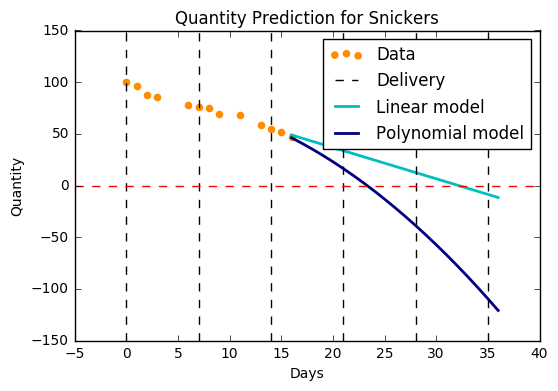

In [7]:
lw = 2
#plt.gca().invert_xaxis()
plt.scatter(X, Y, color='darkorange', label='Data')
plt.hold('on')
#plt.plot(P, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(P, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(P, y_poly, color='navy', lw=lw, label='Polynomial model')
for x in range(0, 42, 7):
    plt.axvline(x=x, color='k', linestyle='--', label='Delivery')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Quantity')
plt.title('Quantity Prediction for Snickers')

# Only unique labels plz
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels)

plt.show()